# ETL process as a part of Data Engineering is carried out in this notebook. We use the world bank data and perform the necessary steps.

# We will be switching between datasets for better understandability.

# Extract


Importing the necessary libraries


In [2]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')


## Reading from API calls

In [11]:
import requests
url = 'http://api.worldbank.org/v2/countries/br;cn;us;de/indicators/SP.POP.TOTL/?format=json&per_page=1000'
r = requests.get(url)
r.json()

[{'page': 1,
  'pages': 1,
  'per_page': 1000,
  'total': 248,
  'sourceid': '2',
  'sourcename': 'World Development Indicators',
  'lastupdated': '2023-03-01'},
 [{'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2021',
   'value': 214326223,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2020',
   'value': 213196304,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2019',
   'value': 211782878,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'BR', 'value': 'Brazil'},

In [16]:
df_population_json = pd.DataFrame(r.json()[1])
df_population_json


,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2021,214326223,,,0
1,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2020,213196304,,,0
2,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2019,211782878,,,0
3,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2018,210166592,,,0
4,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2017,208504960,,,0
...,...,...,...,...,...,...,...,...
243,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'US', 'value': 'United States'}",USA,1964,191889000,,,0
244,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'US', 'value': 'United States'}",USA,1963,189242000,,,0
245,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'US', 'value': 'United States'}",USA,1962,186538000,,,0
246,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'US', 'value': 'United States'}",USA,1961,183691000,,,0


## Reading from a csv file


In [2]:
df_projects = pd.read_csv('../data/population_data.csv')

ParserError: Error tokenizing data. C error: Expected 3 fields in line 5, saw 63


Looks like there is something wrong with the dataset.

Let's use only python to read the first 10 lines from our file


In [3]:
def print_data(n, filename):
    file = open(filename)
    for i in range(n):
        print("Line", i, file.readline())
    file.close()


print_data(11, '../data/population_data.csv')


Line 0 ﻿"Data Source","World Development Indicators",

Line 1 

Line 2 "Last Updated Date","2018-06-28",

Line 3 

Line 4 "Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017",

Line 5 "Aruba","ABW","Population, total","SP.POP.TOTL","54211","55438","56225","56695","57032","57360","57715","58055","58386","58726","59063","59440","59840","60243","60528","60657","60586","60366","60103","59980","60096","60567","61345","62201","62836","63026","62644","61833","61079","61032","62149","64622","68235","72504","76700","80324","83200","85451","87277","89005","90853","92898","94992","97017"

The first 4 lines and the rest seems to have a different pattern in which the values exist

Let's skip the first 4 rows and read the file


In [4]:
df_population = pd.read_csv('../data/population_data.csv', skiprows=4)
df_population


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0,NaN
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0,NaN
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0,NaN
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0,NaN


In [5]:
# Shape of the dataset
df_population.shape


(264, 63)

The last column 'Unnamed: 62' is filled with null values, does not look very useful for our analysis


In [6]:
df_population['Unnamed: 62'].isnull().sum()

264

In [7]:
df_population.drop('Unnamed: 62', inplace=True, axis=1)

In [8]:
# Let's see what rows contain null values
df_population[df_population.isnull().any(axis=1)]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
67,Eritrea,ERI,"Population, total",SP.POP.TOTL,1397491.0,1432640.0,1469645.0,1508273.0,1548187.0,1589179.0,...,4232636.0,4310334.0,4390840.0,4474690.0,NaN,NaN,NaN,NaN,NaN,NaN
108,Not classified,INX,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,Kuwait,KWT,"Population, total",SP.POP.TOTL,269618.0,301336.0,338296.0,379891.0,425235.0,473554.0,...,2652340.0,2818939.0,2998083.0,3191051.0,3395556.0,3598385.0,3782450.0,3935794.0,4052584.0,4136528.0
194,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,3596688.0,3702218.0,3811102.0,3927051.0,4046901.0,4169506.0,4294682.0,4422143.0,4551566.0,4684777.0
212,Serbia,SRB,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,7350222.0,7320807.0,7291436.0,7234099.0,7199077.0,7164132.0,7130576.0,7095383.0,7058322.0,7022268.0
223,Sint Maarten (Dutch part),SXM,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,33964.0,34238.0,34056.0,33435.0,34640.0,36607.0,37685.0,38824.0,39969.0,41109.0


## Reading JSON using the library


In [9]:
import json

# Python treats JSON data as dictionaries

with open('../data/population_data.json') as f:
    json_data = json.load(f)

    print(json_data[0])
    print(json_data[0]['Country Name'])
    print(json_data[0]['Country Code'])
    print(json_data[0]['Indicator Name'])
    print(json_data[0]['Indicator Code'])


{'Country Name': 'Aruba', 'Country Code': 'ABW', 'Indicator Name': 'Population, total', 'Indicator Code': 'SP.POP.TOTL', '1960': 54211.0, '1961': 55438.0, '1962': 56225.0, '1963': 56695.0, '1964': 57032.0, '1965': 57360.0, '1966': 57715.0, '1967': 58055.0, '1968': 58386.0, '1969': 58726.0, '1970': 59063.0, '1971': 59440.0, '1972': 59840.0, '1973': 60243.0, '1974': 60528.0, '1975': 60657.0, '1976': 60586.0, '1977': 60366.0, '1978': 60103.0, '1979': 59980.0, '1980': 60096.0, '1981': 60567.0, '1982': 61345.0, '1983': 62201.0, '1984': 62836.0, '1985': 63026.0, '1986': 62644.0, '1987': 61833.0, '1988': 61079.0, '1989': 61032.0, '1990': 62149.0, '1991': 64622.0, '1992': 68235.0, '1993': 72504.0, '1994': 76700.0, '1995': 80324.0, '1996': 83200.0, '1997': 85451.0, '1998': 87277.0, '1999': 89005.0, '2000': 90853.0, '2001': 92898.0, '2002': 94992.0, '2003': 97017.0, '2004': 98737.0, '2005': 100031.0, '2006': 100832.0, '2007': 101220.0, '2008': 101353.0, '2009': 101453.0, '2010': 101669.0, '2011'

## Reading from a JSON file


Let's look at how the data is present in the JSON file


In [10]:
print_data(5, '../data/population_data.json')

Line 0 [{"Country Name":"Aruba","Country Code":"ABW","Indicator Name":"Population, total","Indicator Code":"SP.POP.TOTL","1960":54211.0,"1961":55438.0,"1962":56225.0,"1963":56695.0,"1964":57032.0,"1965":57360.0,"1966":57715.0,"1967":58055.0,"1968":58386.0,"1969":58726.0,"1970":59063.0,"1971":59440.0,"1972":59840.0,"1973":60243.0,"1974":60528.0,"1975":60657.0,"1976":60586.0,"1977":60366.0,"1978":60103.0,"1979":59980.0,"1980":60096.0,"1981":60567.0,"1982":61345.0,"1983":62201.0,"1984":62836.0,"1985":63026.0,"1986":62644.0,"1987":61833.0,"1988":61079.0,"1989":61032.0,"1990":62149.0,"1991":64622.0,"1992":68235.0,"1993":72504.0,"1994":76700.0,"1995":80324.0,"1996":83200.0,"1997":85451.0,"1998":87277.0,"1999":89005.0,"2000":90853.0,"2001":92898.0,"2002":94992.0,"2003":97017.0,"2004":98737.0,"2005":100031.0,"2006":100832.0,"2007":101220.0,"2008":101353.0,"2009":101453.0,"2010":101669.0,"2011":102053.0,"2012":102577.0,"2013":103187.0,"2014":103795.0,"2015":104341.0,"2016":104822.0,"2017":10526

The data exists in a dictionary like format and the first line is actually the entire JSON data.

We need to use the orient method while reading the data and set it's value to 'records'


In [11]:
df_population_json = pd.read_json(
    '../data/population_data.json', orient='records')
df_population_json

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


# Transform


### Combining Datasets together


In [12]:
df_rural = pd.read_csv('../data/rural_population_percent.csv', skiprows=4)
df_electricity = pd.read_csv(
    '../data/electricity_access_percent.csv', skiprows=4)

In [13]:
df_rural.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893,NaN
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430,NaN
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422,NaN
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684,NaN
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873,NaN


In [14]:
df_electricity.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145,NaN,NaN
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138,NaN,NaN
2,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607,NaN,NaN
3,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN


In [15]:
# Shape of the datasets
df_rural.shape, df_electricity.shape

((264, 63), (264, 63))

In [16]:
# Let's drop the "Unnamed: 62" column as it has lots of Null values

df_electricity.drop("Unnamed: 62", axis=1, inplace=True)
df_rural.drop("Unnamed: 62", axis=1, inplace=True)

In [17]:
df_c = pd.concat([df_rural, df_electricity])
df_c

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.217000,56.579000,56.941000,57.302000,57.636000,57.942000,58.221000,58.472000,58.696000,58.893
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,76.054000,75.687000,75.311000,74.926000,74.532000,74.129000,73.718000,73.297000,72.868000,72.430
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,61.491000,60.701000,59.903000,59.100000,58.301000,57.510000,56.726000,55.950000,55.181000,54.422
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,50.009000,48.924000,47.837000,46.753000,45.670000,44.617000,43.591000,42.593000,41.624000,40.684
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.133000,11.648000,12.183000,12.740000,13.292000,13.835000,14.367000,14.885000,15.388000,15.873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,97.794670,98.377060,0.000000,99.430435,99.773651,99.942505,99.993134,100.000000,100.000000,NaN
260,"Yemen, Rep.",YEM,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,60.386539,61.751400,63.134281,64.532181,65.942101,75.600000,66.100000,70.213905,71.642349,NaN
261,South Africa,ZAF,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,81.900000,82.700000,82.900000,84.700000,85.300000,85.400000,86.000000,85.500000,84.200000,NaN
262,Zambia,ZMB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,22.714685,23.235649,22.000000,24.328644,24.894667,25.469702,27.900000,31.100000,27.219337,NaN


## Let's make the dataset more compact for ease of analysis


In [18]:
# With pd.melt() we create a single column for years from (1960) for both datasets

df_rural_melt = pd.melt(df_rural,
                        id_vars=['Country Name', 'Country Code',
                                 'Indicator Name', 'Indicator Code'],
                        var_name="Year",
                        value_name="Rural_value"
                        )

df_electricity_melt = pd.melt(df_electricity,
                              id_vars=['Country Name', 'Country Code',
                                       'Indicator Name', 'Indicator Code'],
                              var_name='Year',
                              value_name="Electricity_value"

                              )

In [19]:
df_rural_melt.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Rural_value
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,49.224000
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,91.779000
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,89.565000
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,69.295000
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,41.550000
5,Arab World,ARB,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,68.708026
6,United Arab Emirates,ARE,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,26.500000
7,Argentina,ARG,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,26.389000
8,Armenia,ARM,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,48.725000
9,American Samoa,ASM,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,33.789000


In [20]:
df_electricity_melt.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Electricity_value
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
2,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
3,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
5,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
6,United Arab Emirates,ARE,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
7,Argentina,ARG,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
8,Armenia,ARM,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
9,American Samoa,ASM,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN


In [21]:
# Dropping 'Indicator Name'	and 'Indicator Code' columns

df_rural_melt.drop(['Indicator Name', 'Indicator Code'], axis=1, inplace=True)
df_electricity_melt.drop(
    ['Indicator Name', 'Indicator Code'], axis=1, inplace=True)

### Joining both datasets


In [22]:
df_rural_elec_merged = df_rural_melt.merge(df_electricity_melt,
                                           how='outer',
                                           on=['Country Name',
                                               'Country Code', 'Year']
                                           )

In [23]:
df_rural_elec_merged.sort_values(['Country Name', 'Year'])

,Country Name,Country Code,Year,Rural_value,Electricity_value
1,Afghanistan,AFG,1960,91.779,NaN
265,Afghanistan,AFG,1961,91.492,NaN
529,Afghanistan,AFG,1962,91.195,NaN
793,Afghanistan,AFG,1963,90.890,NaN
1057,Afghanistan,AFG,1964,90.574,NaN
...,...,...,...,...,...
14255,Zimbabwe,ZWE,2013,67.346,37.076813
14519,Zimbabwe,ZWE,2014,67.499,32.300000
14783,Zimbabwe,ZWE,2015,67.624,33.700000
15047,Zimbabwe,ZWE,2016,67.723,38.145138


## Cleaning the Data


In [24]:
df_indicators = pd.read_csv('../data/population_data.csv', skiprows=4)
df_indicators.drop('Unnamed: 62', axis=1, inplace=True)
df_indicators

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


In [25]:
df_projects = pd.read_csv('../data/projects_data.csv', dtype=str)
df_projects.drop('Unnamed: 56', axis=1, inplace=True)
df_projects

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme2name,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,P006578,Latin America and Caribbean,Republic of Chile;Republic of Chile,PE,Specific Investment Loan,IN,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg;Grand Duchy of Luxem...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18245,P037362,Europe and Central Asia,Kingdom of Denmark;Kingdom of Denmark,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands;Kingdom of the Neth...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df_projects.columns

Index(['id', 'regionname', 'countryname', 'prodline', 'lendinginstr',
       'lendinginstrtype', 'envassesmentcategorycode', 'supplementprojectflg',
       'productlinetype', 'projectstatusdisplay', 'status', 'project_name',
       'boardapprovaldate', 'board_approval_month', 'closingdate',
       'lendprojectcost', 'ibrdcommamt', 'idacommamt', 'totalamt', 'grantamt',
       'borrower', 'impagency', 'url', 'projectdoc ', 'majorsector_percent ',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector5', 'sector',
       'mjsector1', 'mjsector2', 'mjsector3', 'mjsector4', 'mjsector5',
       'mjsector', 'theme1', 'theme2', 'theme3', 'theme4', 'theme5', 'theme ',
       'goal', 'financier', 'mjtheme1name', 'mjtheme2name', 'mjtheme3name',
       'mjtheme4name', 'mjtheme5name', 'location', 'GeoLocID', 'GeoLocName',
       'Latitude', 'Longitude', 'Country'],
      dtype='object')

The projects dataset has columns 'countryname' and 'Country'


In [27]:
df_projects[['Country', 'countryname']].head(21)

,Country,countryname
0,NaN,World;World
1,NaN,Democratic Republic of the Congo;Democratic Re...
2,NaN,People's Republic of Bangladesh;People's Repub...
3,NaN,Islamic Republic of Afghanistan;Islamic Repu...
4,NG;NG;NG;NG;NG;NG,Federal Republic of Nigeria;Federal Republic o...
5,NaN,Republic of Tunisia;Republic of Tunisia
6,NaN,Federal Republic of Nigeria;Federal Republic o...
7,NaN,Federal Republic of Nigeria;Federal Republic o...
8,NaN,Federal Republic of Nigeria;Federal Republic o...
9,NaN,Lebanese Republic;Lebanese Republic


The 'Country' name has only null values and the 'countryname' column has repeated values separated by ';'


In [28]:
# Removing the duplicate values in the column
df_projects['countryname'] = df_projects['countryname'].str.split(
    ';').str.get(0)
df_projects.rename(columns={"countryname": "Official Country"}, inplace=True)

In [29]:
df_projects[['Official Country']].head(5)

,Official Country
0,World
1,Democratic Republic of the Congo
2,People's Republic of Bangladesh
3,Islamic Republic of Afghanistan
4,Federal Republic of Nigeria


Let's see if the Country entries are same in both datasets


In [30]:
df_projects[df_projects['Official Country'].str.contains(
    'Spain')]['Official Country']

14601    Kingdom of Spain
15072    Kingdom of Spain
15462    Kingdom of Spain
15571    Kingdom of Spain
15672    Kingdom of Spain
15715    Kingdom of Spain
15799    Kingdom of Spain
17434    Kingdom of Spain
17608    Kingdom of Spain
17732    Kingdom of Spain
17790    Kingdom of Spain
17837    Kingdom of Spain
Name: Official Country, dtype: object

In [31]:
df_indicators[df_indicators['Country Name'].str.contains(
    'Spain')]['Country Name']

68    Spain
Name: Country Name, dtype: object

It appears that the project's dataset includes official country names. Consequently, this dataset has an entry like "Kingdom of Spain" but the indicators dataset has only "Spain".


#### Let's use 'pycountry' library for ISO abbreviations and country names which would give us a better insight on how to clean this column on our dataset


In [32]:
from pycountry import countries

In [33]:
countries.lookup('India')

Country(alpha_2='IN', alpha_3='IND', flag='🇮🇳', name='India', numeric='356', official_name='Republic of India')

Let's add the ISO codes to our dataset and store all the countries that do not exist in a variable


In [34]:
from collections import defaultdict

country_not_found = []
project_country_dict = defaultdict(str)

for country in df_projects['Official Country'].drop_duplicates().sort_values():
    try:
        project_country_dict[country] = countries.lookup(country).alpha_3
    except:
        print(country, "Not found")
        country_not_found.append(country)  # %% md


Africa Not found
Andean Countries Not found
Aral Sea Not found
Asia Not found
Caribbean Not found
Caucasus Not found
Central Africa Not found
Central America Not found
Central Asia Not found
Co-operative Republic of Guyana Not found
Commonwealth of Australia Not found
Democratic Republic of Sao Tome and Prin Not found
Democratic Republic of the Congo Not found
Democratic Socialist Republic of Sri Lan Not found
EU Accession Countries Not found
East Asia and Pacific Not found
Eastern Africa Not found
Europe and Central Asia Not found
Islamic  Republic of Afghanistan Not found
Kingdom of Swaziland Not found
Latin America Not found
Macedonia Not found
Mekong Not found
Mercosur Not found
Middle East and North Africa Not found
Multi-Regional Not found
Organization of Eastern Caribbean States Not found
Oriental Republic of Uruguay Not found
Pacific Islands Not found
Red Sea and Gulf of Aden Not found
Republic of Congo Not found
Republic of Cote d'Ivoire Not found
Republic of Korea Not found
R

In [35]:
len(project_country_dict)

151

Let's see if the missing countries are in the indicators dataset


In [36]:
indicator_countries = df_indicators[[
    'Country Name', 'Country Code']].drop_duplicates().sort_values(by='Country Name')

for country in country_not_found:
    if country in indicator_countries['Country Name'].tolist():
        print(country)

South Asia
St. Kitts and Nevis
St. Lucia
St. Vincent and the Grenadines
West Bank and Gaza
World


Not a lot of matches between the datasets


In [37]:
# Dictionary of values sourced from the internet to update the ISO codes for the countries not found
country_not_found_mapping = {'Co-operative Republic of Guyana': 'GUY',
                             'Commonwealth of Australia': 'AUS',
                             'Democratic Republic of Sao Tome and Prin': 'STP',
                             'Democratic Republic of the Congo': 'COD',
                             'Democratic Socialist Republic of Sri Lan': 'LKA',
                             'East Asia and Pacific': 'EAS',
                             'Europe and Central Asia': 'ECS',
                             'Islamic  Republic of Afghanistan': 'AFG',
                             'Latin America': 'LCN',
                             'Caribbean': 'LCN',
                             'Macedonia': 'MKD',
                             'Middle East and North Africa': 'MEA',
                             'Oriental Republic of Uruguay': 'URY',
                             'Republic of Congo': 'COG',
                             "Republic of Cote d'Ivoire": 'CIV',
                             'Republic of Korea': 'KOR',
                             'Republic of Niger': 'NER',
                             'Republic of Kosovo': 'XKX',
                             'Republic of Rwanda': 'RWA',
                             'Republic of The Gambia': 'GMB',
                             'Republic of Togo': 'TGO',
                             'Republic of the Union of Myanmar': 'MMR',
                             'Republica Bolivariana de Venezuela': 'VEN',
                             'Sint Maarten': 'SXM',
                             "Socialist People's Libyan Arab Jamahiriy": 'LBY',
                             'Socialist Republic of Vietnam': 'VNM',
                             'Somali Democratic Republic': 'SOM',
                             'South Asia': 'SAS',
                             'St. Kitts and Nevis': 'KNA',
                             'St. Lucia': 'LCA',
                             'St. Vincent and the Grenadines': 'VCT',
                             'State of Eritrea': 'ERI',
                             'The Independent State of Papua New Guine': 'PNG',
                             'West Bank and Gaza': 'PSE',
                             'World': 'WLD'}

In [38]:
# Updating our dictionary
project_country_dict.update(country_not_found_mapping)

In [39]:
project_country_dict

defaultdict(str,
            {'American Samoa': 'ASM',
             'Antigua and Barbuda': 'ATG',
             'Arab Republic of Egypt': 'EGY',
             'Argentine Republic': 'ARG',
             'Barbados': 'BRB',
             'Belize': 'BLZ',
             'Bosnia and Herzegovina': 'BIH',
             'Burkina Faso': 'BFA',
             'Central African Republic': 'CAF',
             'Commonwealth of Dominica': 'DMA',
             'Commonwealth of The Bahamas': 'BHS',
             'Czech Republic': 'CZE',
             'Democratic Republic of Timor-Leste': 'TLS',
             'Dominican Republic': 'DOM',
             'Federal Democratic Republic of Ethiopia': 'ETH',
             'Federal Republic of Nigeria': 'NGA',
             'Federated States of Micronesia': 'FSM',
             'Federative Republic of Brazil': 'BRA',
             'French Republic': 'FRA',
             'Gabonese Republic': 'GAB',
             'Georgia': 'GEO',
             'Grand Duchy of Luxembourg': 'LUX',
    

In [40]:
# Manually add the ISO codes to the missing countries

df_projects["Country Code"] = df_projects['Official Country'].apply(
    lambda x: project_country_dict[x])

In [41]:
# Countries where the ISO code is empty in our dataset

df_projects[df_projects['Country Code'] == ''][[
    'regionname', 'Official Country', 'Country Code']]

,regionname,Official Country,Country Code
31,Africa,Central Africa,
39,Africa,Africa,
58,Africa,Africa,
69,Africa,Western Africa,
103,East Asia and Pacific,Pacific Islands,
...,...,...,...
17963,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,
18134,Africa,Africa,
18175,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,
18197,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,


## Let's look at the datatypes in our 'projects' dataset


In [42]:
df_projects.dtypes

id                          object
regionname                  object
Official Country            object
prodline                    object
lendinginstr                object
lendinginstrtype            object
envassesmentcategorycode    object
supplementprojectflg        object
productlinetype             object
projectstatusdisplay        object
status                      object
project_name                object
boardapprovaldate           object
board_approval_month        object
closingdate                 object
lendprojectcost             object
ibrdcommamt                 object
idacommamt                  object
totalamt                    object
grantamt                    object
borrower                    object
impagency                   object
url                         object
projectdoc                  object
majorsector_percent         object
sector1                     object
sector2                     object
sector3                     object
sector4             

In [43]:
df_projects[['totalamt', 'lendprojectcost']].head(10)

,totalamt,lendprojectcost
0,0,"500,000"
1,"200,000,000","200,000,000"
2,"58,330,000","50,000,000"
3,"20,000,000","50,000,000"
4,"100,000,000","100,000,000"
5,"500,000,000","500,000,000"
6,"350,000,000","765,000,000"
7,"225,000,000","232,000,000"
8,"125,000,000","125,000,000"
9,"329,900,000","695,000,000"


In [44]:
df_projects['totalamt'].sum()

'0200,000,00058,330,00020,000,000100,000,000500,000,000350,000,000225,000,000125,000,000329,900,000200,000,000400,000,0000150,000,0000389,000,0000530,000,000350,000,000202,000,000300,000,000500,000,000493,060,000175,000,0000230,000,00080,000,000400,000,000130,000,00030,000,00035,000,0000250,000,000200,000,000400,000,000110,000,000150,000,00074,000,000118,000,000465,000,000050,000,00090,000,000100,000,000130,000,00010,000,000460,600,000100,000,000700,000,00030,000,000280,000,00040,000,000300,000,00090,000,000150,000,000150,000,00043,000,000100,000,00015,000,00015,000,000012,000,00030,000,000100,000,000250,000,000200,000,000150,000,00025,000,000500,000,000122,100,00020,000,00007,390,000000050,000,00075,000,00060,000,00025,000,00015,000,00000300,000,00025,000,00011,000,0009,000,000130,000,000140,000,000100,000,000200,000,00070,000,000140,000,00020,000,000188,000,000200,000,000500,000,00014,200,00040,000,000150,000,000003,550,000600,000,000400,000,0000150,000,0006,000,00012,000,000100,000,

The 'totalamt' column is of datatype 'str' because there exists a mismatch in datatype values in the column for which we imported the entire csv file data as 'str'


In [45]:
# Let's convert the 'totalamt' and 'lendprojectcost' columns

df_projects['totalamt'] = pd.to_numeric(
    df_projects['totalamt'].str.replace(',', ""))
df_projects['lendprojectcost'] = pd.to_numeric(
    df_projects['lendprojectcost'].str.replace(',', ""))

In [46]:
df_projects['totalamt'].sum()

1185192800000

In [47]:
df_projects['lendprojectcost'].sum()

2443475480000.0

## Parsing Dates


### Let's look at our columns that could be parsed as dates


In [48]:
df_projects[['boardapprovaldate', 'board_approval_month', 'closingdate']]

,boardapprovaldate,board_approval_month,closingdate
0,2018-06-28T00:00:00Z,June,NaN
1,2018-06-28T00:00:00Z,June,2023-12-31T00:00:00Z
2,2018-06-28T00:00:00Z,June,NaN
3,2018-06-27T00:00:00Z,June,2023-06-28T00:00:00Z
4,2018-06-27T00:00:00Z,June,2023-05-31T00:00:00Z
...,...,...,...
18243,1948-03-25T00:00:00Z,March,1954-12-31T00:00:00Z
18244,1947-08-28T00:00:00Z,August,1949-03-31T00:00:00Z
18245,1947-08-22T00:00:00Z,August,1949-03-31T00:00:00Z
18246,1947-08-07T00:00:00Z,August,1948-06-30T00:00:00Z


In [49]:
# Coverting these columns to datatime dtype

df_projects['boardapprovaldate'] = pd.to_datetime(
    df_projects['boardapprovaldate'])

df_projects['closingdate'] = pd.to_datetime(df_projects['closingdate'])

In [50]:
# Creating new columns based on 'boardapprovaldate'

df_projects['approvalyear'] = df_projects['boardapprovaldate'].dt.year
df_projects['approvalday'] = df_projects['boardapprovaldate'].dt.day
df_projects['approvalweekday'] = df_projects['boardapprovaldate'].dt.weekday

df_projects['closingyear'] = df_projects['closingdate'].dt.year
df_projects['closingday'] = df_projects['closingdate'].dt.day
df_projects['closingweekday'] = df_projects['closingdate'].dt.weekday


## ENCODINGS

#### The most common encoding is 'utf-8'. Pandas will atomatically assume as 'utf-8' unless specified otherwise.


### Let's work with a dataset that has an encoding format that is not known, and we will try to find the right encoding format.


In [51]:
df_mystery = pd.read_csv('../data/mystery.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte

### To figure this out we could use the 'alias' library


In [52]:
from encodings.aliases import aliases

In [53]:
# Loading all possible encoding formats as a list in a variable
aliases_values = set(aliases.values())

In [54]:
aliases_values

{'ascii',
 'base64_codec',
 'big5',
 'big5hkscs',
 'bz2_codec',
 'cp037',
 'cp1026',
 'cp1125',
 'cp1140',
 'cp1250',
 'cp1251',
 'cp1252',
 'cp1253',
 'cp1254',
 'cp1255',
 'cp1256',
 'cp1257',
 'cp1258',
 'cp273',
 'cp424',
 'cp437',
 'cp500',
 'cp775',
 'cp850',
 'cp852',
 'cp855',
 'cp857',
 'cp858',
 'cp860',
 'cp861',
 'cp862',
 'cp863',
 'cp864',
 'cp865',
 'cp866',
 'cp869',
 'cp932',
 'cp949',
 'cp950',
 'euc_jis_2004',
 'euc_jisx0213',
 'euc_jp',
 'euc_kr',
 'gb18030',
 'gb2312',
 'gbk',
 'hex_codec',
 'hp_roman8',
 'hz',
 'iso2022_jp',
 'iso2022_jp_1',
 'iso2022_jp_2',
 'iso2022_jp_2004',
 'iso2022_jp_3',
 'iso2022_jp_ext',
 'iso2022_kr',
 'iso8859_10',
 'iso8859_11',
 'iso8859_13',
 'iso8859_14',
 'iso8859_15',
 'iso8859_16',
 'iso8859_2',
 'iso8859_3',
 'iso8859_4',
 'iso8859_5',
 'iso8859_6',
 'iso8859_7',
 'iso8859_8',
 'iso8859_9',
 'johab',
 'koi8_r',
 'kz1048',
 'latin_1',
 'mac_cyrillic',
 'mac_greek',
 'mac_iceland',
 'mac_latin2',
 'mac_roman',
 'mac_turkish',
 'mb

In [55]:
possible_encodings = []

for encoding in set(aliases.values()):

    try:
        df_mystery = pd.read_csv('../data/mystery.csv', encoding=encoding)
        #print('Successful', encoding)
        possible_encodings.append(encoding)
    except:
        pass


In [56]:
possible_encodings

['utf_16_be',
 'utf_16',
 'cp037',
 'cp500',
 'utf_16_le',
 'cp1026',
 'cp1140',
 'cp273']

In [57]:
# Now let's use any of the above encodings to read the file
df_mystery = pd.read_csv("../data/mystery.csv", encoding='utf_16')
df_mystery.head(5)

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


## Another method is by using the 'chardet' library


In [58]:
import chardet

f = open('../data/mystery.csv', 'rb')

print(chardet.detect(f.read()))


{'encoding': 'UTF-16', 'confidence': 1.0, 'language': ''}


## Missing Values


In [59]:
df_gdp = pd.read_csv('../data/gdp_data.csv', skiprows=4)
df_gdp.drop('Unnamed: 62', axis=1, inplace=True)
df_gdp

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417804e+10,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.687488e+09,5.653793e+09,5.829934e+09,6.686683e+09,6.500193e+09,7.073420e+09,7.386891e+09,6.439947e+09,6.715487e+09,7.128691e+09
260,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.691085e+10,2.513027e+10,3.090675e+10,3.272642e+10,3.540133e+10,4.041524e+10,4.322858e+10,3.460248e+10,1.821333e+10,NaN
261,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575248e+09,7.972841e+09,8.497830e+09,9.423212e+09,1.037379e+10,1.133417e+10,...,2.871000e+11,2.972167e+11,3.752981e+11,4.168782e+11,3.963327e+11,3.668294e+11,3.509046e+11,3.177410e+11,2.957627e+11,3.494193e+11
262,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,1.791086e+10,1.532834e+10,2.026556e+10,2.346010e+10,2.550337e+10,2.804546e+10,2.715063e+10,2.115439e+10,2.095475e+10,2.580867e+10


In [60]:
df_gdp.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              140
                 ... 
2013               16
2014               17
2015               18
2016               23
2017               30
Length: 62, dtype: int64

In [61]:
df_gdp

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417804e+10,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.687488e+09,5.653793e+09,5.829934e+09,6.686683e+09,6.500193e+09,7.073420e+09,7.386891e+09,6.439947e+09,6.715487e+09,7.128691e+09
260,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.691085e+10,2.513027e+10,3.090675e+10,3.272642e+10,3.540133e+10,4.041524e+10,4.322858e+10,3.460248e+10,1.821333e+10,NaN
261,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575248e+09,7.972841e+09,8.497830e+09,9.423212e+09,1.037379e+10,1.133417e+10,...,2.871000e+11,2.972167e+11,3.752981e+11,4.168782e+11,3.963327e+11,3.668294e+11,3.509046e+11,3.177410e+11,2.957627e+11,3.494193e+11
262,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,1.791086e+10,1.532834e+10,2.026556e+10,2.346010e+10,2.550337e+10,2.804546e+10,2.715063e+10,2.115439e+10,2.095475e+10,2.580867e+10


In [62]:
# Let's pivot the dataset around country name and year for better analysis

df_gdp_melt = pd.melt(df_gdp,
                      id_vars=['Country Name', 'Country Code',
                               'Indicator Name', 'Indicator Code'],
                      var_name='year',
                      value_name="GDP"

                      )
df_gdp_melt

,Country Name,Country Code,Indicator Name,Indicator Code,year,GDP
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960,5.377778e+08
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN
...,...,...,...,...,...,...
15307,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,2017,7.128691e+09
15308,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,2017,NaN
15309,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,2017,3.494193e+11
15310,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,2017,2.580867e+10


In [63]:
df_gdp_melt['year'] = pd.to_datetime(df_gdp_melt['year'])

In [64]:
# Rows with missing values 

df_gdp_melt[df_gdp_melt.isnull().any(
    axis=1)].sort_values('GDP', ascending=False)

,Country Name,Country Code,Indicator Name,Indicator Code,year,GDP
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1960-01-01,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,1960-01-01,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,1960-01-01,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,1960-01-01,NaN
5,Arab World,ARB,GDP (current US$),NY.GDP.MKTP.CD,1960-01-01,NaN
...,...,...,...,...,...,...
15274,Turks and Caicos Islands,TCA,GDP (current US$),NY.GDP.MKTP.CD,2017-01-01,NaN
15300,"Venezuela, RB",VEN,GDP (current US$),NY.GDP.MKTP.CD,2017-01-01,NaN
15301,British Virgin Islands,VGB,GDP (current US$),NY.GDP.MKTP.CD,2017-01-01,NaN
15302,Virgin Islands (U.S.),VIR,GDP (current US$),NY.GDP.MKTP.CD,2017-01-01,NaN


In [65]:
# plot_data() function takes in a column that contains missing values throughout the years and 
# creates a line plot for three different countries with maximum number of missing values

def plot_data(column):
    

    fig, ax = plt.subplots(figsize=(12, 8))

    df_gdp_melt[
        (df_gdp_melt['Country Name'] == 'Aruba') |
        (df_gdp_melt['Country Name'] == 'Angola') |
        (df_gdp_melt['Country Name'] == 'Albania')].groupby(
        "Country Name").plot('year', column, legend=True, ax=ax)
    ax.legend(labels=['Aruba', 'Angola', 'Albania'])
    ax.set_title("Missing Values over the Years (Countries)", fontsize=15)
    ax.set_xlabel("Years", fontsize=15)


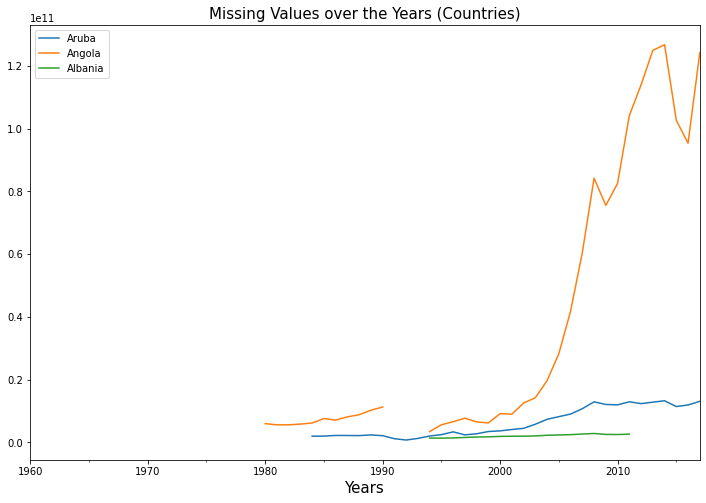

In [66]:
plot_data("GDP")


## Filling Missing Values with Mean


In [67]:
df_gdp_melt['GDP_filled_mean'] = df_gdp_melt.groupby('Country Name')['GDP'].apply(
    lambda x: x.fillna(x.mean())
)

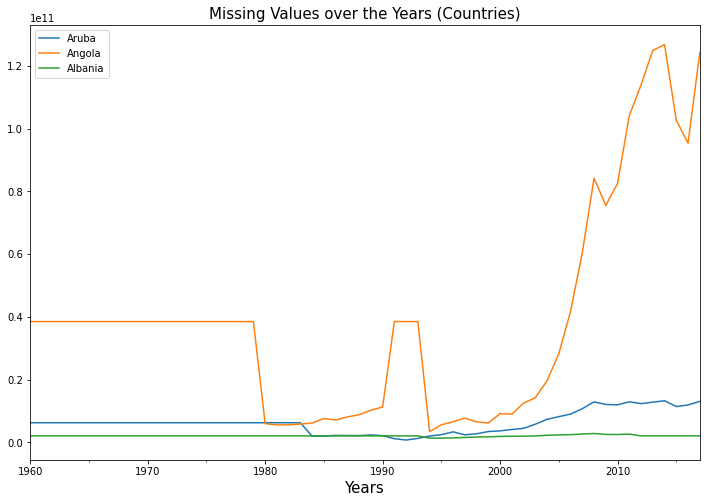

In [68]:
# We use plot_data() function to plot the data after filling missing values with mean

plot_data("GDP_filled_mean")

## Filling Missing Values with FFILL

### Sorting before applying Forward Fill


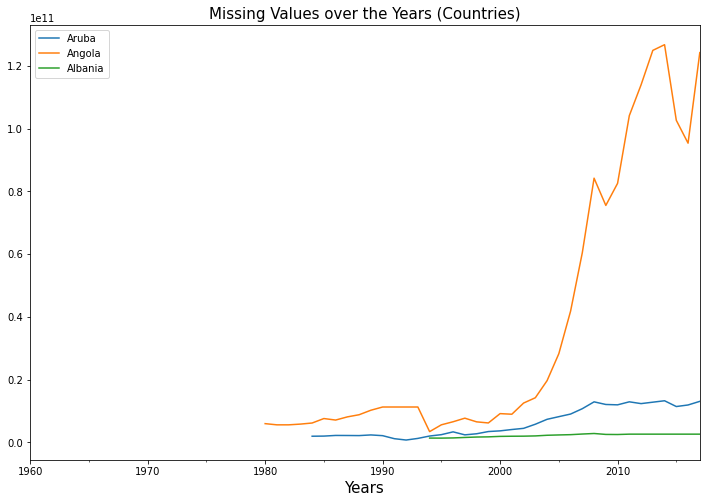

In [69]:
df_gdp_melt['GDP_filled_ffill'] = df_gdp_melt.sort_values(
    'year').groupby('Country Name')['GDP'].fillna(method='ffill')

# We use plot_data() function to plot the data after filling missing values with forward fill

plot_data("GDP_filled_ffill")

## Filling Missing Values with BFILL

### Sorting before applying Backward Fill


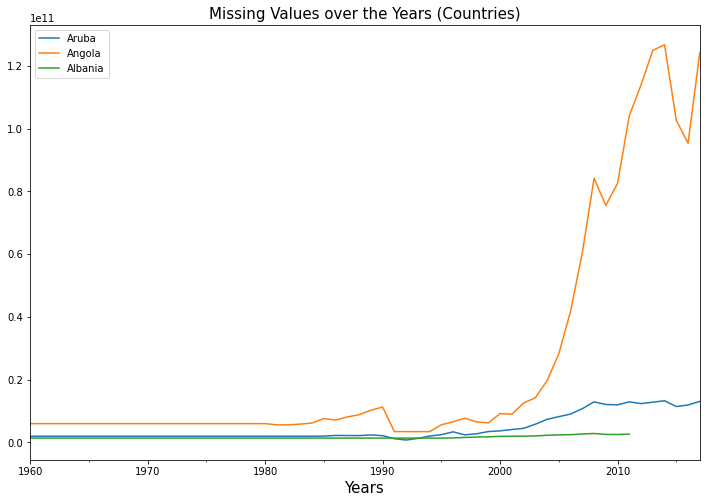

In [70]:
df_gdp_melt['GDP_filled_bfill'] = df_gdp_melt.sort_values(
    'year').groupby('Country Name')['GDP'].fillna(method='bfill')


# We use plot_data() function to plot the data after filling missing values with backward fill

plot_data("GDP_filled_bfill")


### Both 'ffill' and 'bfill' on using independently completley did not fill our dataset

#### To fill completely fill the datase we might have to use both ethods together i.e. forward fill followed by backward fill


## Data Cleaning and Dummy Variables


If you were to setup a model you must be aware that the ML models only take in numeric values and for that purpose we use pandas 'get_dummies()' to convert categorical values to numerical values


From our projects dataset let's look at sector columns only for this process


In [71]:
sectors = df_projects.copy()
sectors = sectors[['project_name', 'lendinginstr', 'sector1', 'sector2', 'sector3', 'sector4', 'sector5', 'sector',
                   'mjsector1', 'mjsector2', 'mjsector3', 'mjsector4', 'mjsector5',
                  'mjsector', 'theme1', 'theme2', 'theme3', 'theme4', 'theme5', 'theme ',
                   'goal', 'financier', 'mjtheme1name', 'mjtheme2name', 'mjtheme3name',
                   'mjtheme4name', 'mjtheme5name']]

In [72]:
sectors.head(5)

,project_name,lendinginstr,sector1,sector2,sector3,sector4,sector5,sector,mjsector1,mjsector2,...,theme4,theme5,theme,goal,financier,mjtheme1name,mjtheme2name,mjtheme3name,mjtheme4name,mjtheme5name
0,Creating a Trade in Value-Added Database for ...,Investment Project Financing,!$!0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Productive Inclusion Project,Investment Project Financing,!$!0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Additional Financing for Health Sector Support...,Investment Project Financing,!$!0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Public-Private Partnerships and Public Investm...,Investment Project Financing,!$!0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Nigeria For Women Project,Investment Project Financing,Social Protection!$!63!$!SA,Other Industry; Trade and Services!$!25!$!YZ,Other Agriculture; Fishing and Forestry!$!2!$!AZ,Other Public Administration!$!10!$!BZ,NaN,Social Protection;Social Protection;Other Indu...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
# Let's look at the proportion of null values

100*sectors.isnull().sum()/sectors.shape[0]

project_name      0.000000
lendinginstr      1.348093
sector1           0.000000
sector2          47.791539
sector3          64.450899
sector4          76.019290
sector5          85.132617
sector            3.496274
mjsector1       100.000000
mjsector2       100.000000
mjsector3       100.000000
mjsector4       100.000000
mjsector5       100.000000
mjsector          3.496274
theme1            0.000000
theme2           46.005042
theme3           58.987286
theme4           71.317405
theme5           83.954406
theme           100.000000
goal             33.510522
financier        61.310829
mjtheme1name    100.000000
mjtheme2name    100.000000
mjtheme3name    100.000000
mjtheme4name    100.000000
mjtheme5name    100.000000
dtype: float64

'sector1' column has not null values. Let's work on that column


In [74]:
sectors[['sector1']]

,sector1
0,!$!0
1,!$!0
2,!$!0
3,!$!0
4,Social Protection!$!63!$!SA
...,...
18243,(Historic)Hydro!$!100!$!PH
18244,(Historic)Economic management!$!100!$!ME
18245,(Historic)Economic management!$!100!$!ME
18246,(Historic)Economic management!$!100!$!ME


Let's look at the unique values in our sector1 column


In [75]:
sector_1_unq = list(sectors['sector1'].sort_values().unique())
sector_1_unq

['!$!0',
 '(Historic)Agency reform!$!50!$!AG',
 '(Historic)Agricultural credit!$!100!$!AC',
 '(Historic)Agricultural extension!$!100!$!AE',
 '(Historic)Agriculture adjustment!$!100!$!AA',
 '(Historic)Agriculture adjustment!$!60!$!AA',
 '(Historic)Agro-industry and marketing!$!100!$!AM',
 '(Historic)Agro-industry!$!100!$!AN',
 '(Historic)Annual crops!$!100!$!AQ',
 '(Historic)Basic health!$!100!$!HB',
 '(Historic)Business environment!$!100!$!DB',
 '(Historic)Civil service reform!$!100!$!BA',
 '(Historic)Civil service reform!$!50!$!BA',
 '(Historic)Decentralization!$!100!$!BD',
 '(Historic)Distribution and transmission!$!100!$!PD',
 '(Historic)Economic management!$!100!$!ME',
 '(Historic)Economic management!$!40!$!ME',
 '(Historic)Education adjustment!$!100!$!EE',
 '(Historic)Electric power and other energy adjustment!$!100!$!PP',
 '(Historic)Environment adjustment!$!100!$!VV',
 '(Historic)Environmental institutions!$!100!$!VI',
 '(Historic)Fertilizer and other chemicals!$!100!$!IC',
 '(H

In [76]:
# Length of unique values in sector1

len(sector_1_unq)

3060

That's a lot of values and if we were to apply the dummy variable function we need to remember that for n categorical values we get n-1 new variables


Let's try to minimize the data


The first value in our list is '!$!0' which does not make any sense. So let's replace it with nan values


In [77]:
sectors['sector1'] = sectors['sector1'].replace('!$!0', np.nan)

Same for '(Historic)' and ' !$!88!$!AI ' values


In [78]:
sectors['sector1'] = sectors['sector1'].replace('!.+', '', regex=True)

In [79]:
sectors['sector1'] = sectors['sector1'].replace(
    '^(\(Historic\))', '', regex=True)

In [80]:
sectors['sector1']

0                        NaN
1                        NaN
2                        NaN
3                        NaN
4          Social Protection
                ...         
18243                  Hydro
18244    Economic management
18245    Economic management
18246    Economic management
18247    Economic management
Name: sector1, Length: 18248, dtype: object

In [81]:
# Length of the sector1 column
len(list(sectors['sector1'].unique()))

156

In [82]:
# Null values in the sector1 column
sectors['sector1'].isnull().sum()/sectors['sector1'].shape[0]

0.03496273564226217

We have brought down the count from 3060 to 156 in the sector1 column


In [83]:
sectors['sector1'].unique()

array([nan, 'Social Protection', 'Urban Transport',
       'Other Public Administration',
       'Workforce Development and Vocational Education',
       'Energy Transmission and Distribution', 'Renewable Energy Solar',
       'Other Industry; Trade and Services', 'Health', 'Water Supply',
       'Primary Education',
       'Other Water Supply; Sanitation and Waste Management',
       'Public Administration - Energy and Extractives',
       'Central Government (Central Agencies)', 'ICT Services',
       'Rural and Inter-Urban Roads', 'Public Administration - Education',
       'Sub-National Government', 'Other Education',
       'Other Transportation', 'Renewable Energy Hydro',
       'Public Administration - Agriculture; Fishing & Forestry',
       'Public Administration - Transportation', 'Oil and Gas',
       'Other Non-bank Financial Institutions', 'Ports/Waterways',
       'Public Administration - Financial Sector', 'Mining',
       'Public Administration - Social Protection',
   

We could try to further bring down the count

If you look at the values you could see some common terms like 'Energy' and 'Transportation'

One approach is to group these together and define as a single values variable.

'Renewable Energy Hydro' and 'Public Administration - Energy and Extractives'
can be renamed as 'Energy'


In [84]:
# Create a new variable so that you don't tamper the original

sectors.loc[:, 'sector_aggregates'] = sectors['sector1']

In [85]:
import re

sectors.loc[sectors['sector_aggregates'].str.contains(
    'Energy', re.IGNORECASE).replace(np.nan, False), 'sector_aggregates'] = 'Energy'
sectors.loc[sectors['sector_aggregates'].str.contains('Transportation', re.IGNORECASE).replace(
    np.nan, False), 'sector_aggregates'] = 'Transportation'


In [86]:
# Length after assigning new values

print('Number of unique sectors:', len(
    list(sectors['sector_aggregates'].unique())))


Number of unique sectors: 145


## Outliers


In [87]:
# Preprocessing of WorldBank Data

df_gdp = pd.read_csv('../data/gdp_data.csv', skiprows=4)
df_gdp.drop(['Unnamed: 62', 'Country Code', 'Indicator Name',
            'Indicator Code'], inplace=True, axis=1)
df_gdp_melt = df_gdp.melt(id_vars=['Country Name'],
                          var_name='year',
                          value_name='GDP')

df_population = pd.read_csv('../data/population_data.csv', skiprows=4)
df_population.drop(['Unnamed: 62', 'Country Code',
                   'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
df_population_melt = df_population.melt(id_vars=['Country Name'],
                                        var_name='year',
                                        value_name='population')


In [88]:
df_gdp_melt

,Country Name,year,GDP
0,Aruba,1960,NaN
1,Afghanistan,1960,5.377778e+08
2,Angola,1960,NaN
3,Albania,1960,NaN
4,Andorra,1960,NaN
...,...,...,...
15307,Kosovo,2017,7.128691e+09
15308,"Yemen, Rep.",2017,NaN
15309,South Africa,2017,3.494193e+11
15310,Zambia,2017,2.580867e+10


In [89]:
df_population_melt

,Country Name,year,population
0,Aruba,1960,54211.0
1,Afghanistan,1960,8996351.0
2,Angola,1960,5643182.0
3,Albania,1960,1608800.0
4,Andorra,1960,13411.0
...,...,...,...
15307,Kosovo,2017,1830700.0
15308,"Yemen, Rep.",2017,28250420.0
15309,South Africa,2017,56717156.0
15310,Zambia,2017,17094130.0


In [90]:
# Using FFILL and BFILL to fill the null values by Country Name

# For Popultaion data

df_population_melt['population'] = df_population_melt.sort_values('year').groupby(
    'Country Name')['population'].fillna(method='ffill').fillna(method='bfill')

# For GDP data

df_gdp_melt['GDP'] = df_gdp_melt.sort_values('year').groupby(
    'Country Name')['GDP'].fillna(method='ffill').fillna(method='bfill')

In [91]:
# Merging the two dataframes

df_country = df_gdp_melt.merge(df_population_melt, on=['Country Name', 'year'])

In [92]:
# Let's consider data for only the year 2017

df_2017 = df_country[df_country['year'] == '2017']
df_2017

,Country Name,year,GDP,population
15048,Aruba,2017,2.584464e+09,105264.0
15049,Afghanistan,2017,2.081530e+10,35530081.0
15050,Angola,2017,1.242094e+11,29784193.0
15051,Albania,2017,1.303935e+10,2873457.0
15052,Andorra,2017,3.012914e+09,76965.0
...,...,...,...,...
15307,Kosovo,2017,7.128691e+09,1830700.0
15308,"Yemen, Rep.",2017,1.821333e+10,28250420.0
15309,South Africa,2017,3.494193e+11,56717156.0
15310,Zambia,2017,2.580867e+10,17094130.0


In [93]:
# Finding the outliers using Tukey rule that calculates Q1, Q3 and IQR to determine the outliers

def tukey(column):

    data = df_2017[['Country Name', column]]

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    IQR = Q3-Q1

    max_values = Q3 + 1.5 * IQR
    min_values = Q1 - 1.5 * IQR

    return data[(data[column] > max_values) | (data[column] < min_values)]


In [94]:
# For Population data

tukey('population')

,Country Name,population
15053,Arab World,4.144919e+08
15066,Bangladesh,1.646698e+08
15075,Brazil,2.092883e+08
15086,China,1.386395e+09
15107,East Asia & Pacific (excluding high income),2.068308e+09
15108,Early-demographic dividend,3.213427e+09
15109,East Asia & Pacific,2.314365e+09
15110,Europe & Central Asia (excluding high income),4.155462e+08
15111,Europe & Central Asia,9.155458e+08
15114,Euro area,3.414651e+08


In [95]:
# For GDP Data

tukey('GDP')

,Country Name,GDP
15053,Arab World,2.591047e+12
15059,Australia,1.323421e+12
15075,Brazil,2.055506e+12
15081,Canada,1.653043e+12
15082,Central Europe and the Baltics,1.450747e+12
15086,China,1.223770e+13
15101,Germany,3.677439e+12
15107,East Asia & Pacific (excluding high income),1.474232e+13
15108,Early-demographic dividend,1.124936e+13
15109,East Asia & Pacific,2.399925e+13


In [96]:
# List of values that are not countries
non_countries = ['World',
                 'High income',
                 'OECD members',
                 'Post-demographic dividend',
                 'IDA & IBRD total',
                 'Low & middle income',
                 'Middle income',
                 'IBRD only',
                 'East Asia & Pacific',
                 'Europe & Central Asia',
                 'North America',
                 'Upper middle income',
                 'Late-demographic dividend',
                 'European Union',
                 'East Asia & Pacific (excluding high income)',
                 'East Asia & Pacific (IDA & IBRD countries)',
                 'Euro area',
                 'Early-demographic dividend',
                 'Lower middle income',
                 'Latin America & Caribbean',
                 'Latin America & the Caribbean (IDA & IBRD countries)',
                 'Latin America & Caribbean (excluding high income)',
                 'Europe & Central Asia (IDA & IBRD countries)',
                 'Middle East & North Africa',
                 'Europe & Central Asia (excluding high income)',
                 'South Asia (IDA & IBRD)',
                 'South Asia',
                 'Arab World',
                 'IDA total',
                 'Sub-Saharan Africa',
                 'Sub-Saharan Africa (IDA & IBRD countries)',
                 'Sub-Saharan Africa (excluding high income)',
                 'Middle East & North Africa (excluding high income)',
                 'Middle East & North Africa (IDA & IBRD countries)',
                 'Central Europe and the Baltics',
                 'Pre-demographic dividend',
                 'IDA only',
                 'Least developed countries: UN classification',
                 'IDA blend',
                 'Fragile and conflict affected situations',
                 'Heavily indebted poor countries (HIPC)',
                 'Low income',
                 'Small states',
                 'Other small states',
                 'Not classified',
                 'Caribbean small states',
                 'Pacific island small states']

In [97]:
# Storing only valid countries in our dataset

df_2017 = df_2017[~df_2017["Country Name"].isin(non_countries)]

In [98]:
df_2017

,Country Name,year,GDP,population
15048,Aruba,2017,2.584464e+09,105264.0
15049,Afghanistan,2017,2.081530e+10,35530081.0
15050,Angola,2017,1.242094e+11,29784193.0
15051,Albania,2017,1.303935e+10,2873457.0
15052,Andorra,2017,3.012914e+09,76965.0
...,...,...,...,...
15307,Kosovo,2017,7.128691e+09,1830700.0
15308,"Yemen, Rep.",2017,1.821333e+10,28250420.0
15309,South Africa,2017,3.494193e+11,56717156.0
15310,Zambia,2017,2.580867e+10,17094130.0


In [99]:
# Applying tukey again on the cleaned df_2017 dataset

population_ouliers = tukey('population')
population_ouliers

,Country Name,population
15066,Bangladesh,1.646698e+08
15075,Brazil,2.092883e+08
15086,China,1.386395e+09
15089,"Congo, Dem. Rep.",8.133999e+07
15101,Germany,8.269500e+07
15113,"Egypt, Arab Rep.",9.755315e+07
15118,Ethiopia,1.049574e+08
15123,France,6.711865e+07
15127,United Kingdom,6.602227e+07
15152,Indonesia,2.639914e+08


In [100]:
gdp_outliers = tukey('GDP')
gdp_outliers


,Country Name,GDP
15055,Argentina,6.375904e+11
15059,Australia,1.323421e+12
15063,Belgium,4.926813e+11
15075,Brazil,2.055506e+12
15081,Canada,1.653043e+12
15083,Switzerland,6.788873e+11
15086,China,1.223770e+13
15101,Germany,3.677439e+12
15116,Spain,1.311320e+12
15123,France,2.582501e+12


In [102]:
# Plotting GDP vs Popuation 
def plot_outlier(df):

    fig, ax = plt.subplots(figsize=(12, 8))

    x = list(df['population'])
    y = list(df['GDP'])

    ax.scatter(x=x, y=y)
    ax.set_title("GDP VS POPULATION", fontsize=20)
    ax.set_ylabel("GDP")
    ax.set_xlabel("Population")

    for i, text in enumerate(df['Country Name']):
        ax.annotate(text, (x[i], y[i]))


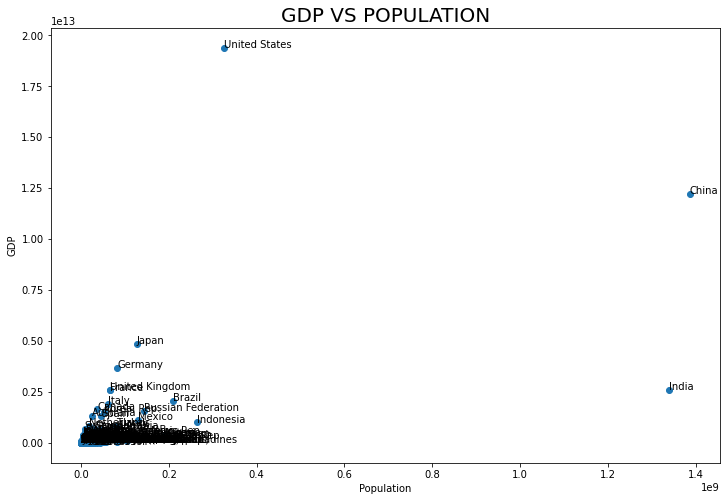

In [103]:
plot_outlier(df_2017)


As we could see that from our dataset 'df_2017' it's hard to see the data clearly because of the values the countries USA, China and India are holding which are significantly large compared to other countries


Let's remove those countries and plot again


In [104]:
large_countries = ['United States', 'China', 'India']

df_no_large = df_2017[~df_2017['Country Name'].isin(large_countries)]


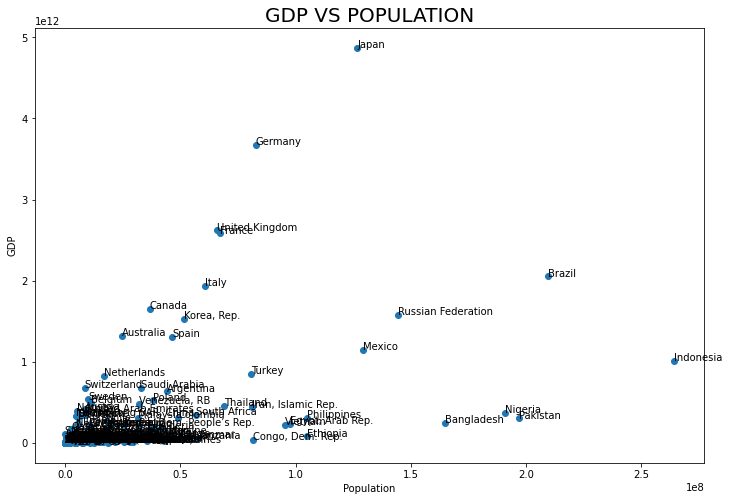

In [105]:
plot_outlier(df_no_large)


# Load


In [106]:
df_country.head(2)

,Country Name,year,GDP,population
0,Aruba,1960,1.916242e+09,54211.0
1,Afghanistan,1960,5.377778e+08,8996351.0


### Output the data as JSON


In [107]:
df_country.to_json('countrydata.json', orient='records')

### Output the data as CSV


In [108]:
df_country.to_csv('countrydata.csv', index=False)

### Output the data as sqlite database

In [109]:
import sqlite3

# sqlite3 will create this database file if it does not exist
conn = sqlite3.connect('worldbank.db')

In [110]:
# output the df_country dataframe to a SQL table called 'country'.
df_country.to_sql('country',con=conn,if_exists='replace',index=False)

15312

In [111]:
# Making sure we area able to read the data from the database

pd.read_sql('SELECT * FROM country ', con = conn).head()

,Country Name,year,GDP,population
0,Aruba,1960,1.916242e+09,54211.0
1,Afghanistan,1960,5.377778e+08,8996351.0
2,Angola,1960,1.857319e+10,5643182.0
3,Albania,1960,1.857319e+10,1608800.0
4,Andorra,1960,1.857319e+10,13411.0


### Let's create a population table in our database and insert the values from our population dataframe

In [113]:
df_population_melt

,Country Name,year,population
0,Aruba,1960,54211.0
1,Afghanistan,1960,8996351.0
2,Angola,1960,5643182.0
3,Albania,1960,1608800.0
4,Andorra,1960,13411.0
...,...,...,...
15307,Kosovo,2017,1830700.0
15308,"Yemen, Rep.",2017,28250420.0
15309,South Africa,2017,56717156.0
15310,Zambia,2017,17094130.0


In [114]:
df_population_database = df_population_melt.copy()
df_population_database.reset_index(inplace=True)
df_population_database.rename(columns={"Country Name":"countryname",'index':"id"},inplace=True)
df_population_database

,id,countryname,year,population
0,0,Aruba,1960,54211.0
1,1,Afghanistan,1960,8996351.0
2,2,Angola,1960,5643182.0
3,3,Albania,1960,1608800.0
4,4,Andorra,1960,13411.0
...,...,...,...,...
15307,15307,Kosovo,2017,1830700.0
15308,15308,"Yemen, Rep.",2017,28250420.0
15309,15309,South Africa,2017,56717156.0
15310,15310,Zambia,2017,17094130.0


In [115]:
cur = conn.cursor()

In [116]:
# Drop if population table exists if any

cur.execute("DROP TABLE IF EXISTS population")
conn.commit()

In [117]:
# Creating the table

cur.execute("CREATE TABLE population (id INTEGER,countryname TEXT, year TEXT, population REAL, PRIMARY KEY(id));")

conn.commit()

In [119]:
# Add values from our dataframe to the table in SQL

for i, values in df_population_database.iterrows():
    id,countryname,year,population = values

    if year == 'nan':
        year = 0
    
    sql_string = 'INSERT INTO population (id,countryname,year,population) VALUES\
        ("{}","{}","{}","{}");'.format(id,countryname,year,population)
    
    cur.execute(sql_string)

conn.commit()    

In [120]:
# Checking to see if tables are loaded as expected

sql_query = "Select * from population"
pd.read_sql('SELECT * FROM population ', con = conn).head()

,id,countryname,year,population
0,0,Aruba,1960,54211.0
1,1,Afghanistan,1960,8996351.0
2,2,Angola,1960,5643182.0
3,3,Albania,1960,1608800.0
4,4,Andorra,1960,13411.0


The End